<a href="https://colab.research.google.com/github/maren318/MAT421_Fenglin/blob/main/MAT421_ModuleH_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### ODE Initial Value Problem Statement

An ordinary differential equation (ODE) specifically deals with functions of a single variable and their derivatives. In general, an ODE of order n can be expressed as a function F involving the function $f(x)$, its derivatives up to order n-1, and equals the nth derivative of $f(x)$.

For example, a pendulum's motion, characterized by its angle over time $Θ(t)$ in the presence of gravity, can be modeled by an ODE derived from summing forces and converting to polar coordinates. This pendulum equation is a practical illustration of an ODE in physics.

In contrast, partial differential equations (PDEs) involve multiple independent variables and partial derivatives, addressing more complex phenomena like temperature distribution in a material over time and space, described by the heat equation.

Solving a differential equation often involves finding a general solution that fits the equation for all possible cases or a particular solution that satisfies specific initial conditions or boundary values.

the motion of a pendulum under the small angle approximation, using the equation $l\frac{d^2θ(t)}{dt^2}=-gθ(t)$, wherel is the length of the pendulum and g is the acceleration due to gravity. The initial angle $θ_0$ is set to 0.1 radian, assuming small oscillations for which the approximation $sin(θ)≈θ$ holds.

The simulation calculates the angular position $(θ(t))$, velocity $(\frac{dθ(t)}{dt})$, and acceleration $(\frac{d^2θ(t)}{dt^2})$ of the pendulum over time and plots these values. The angular position oscillates as a cosine wave, a characteristic behavior of the pendulum under small angles, with its velocity and acceleration showing corresponding sine and cosine waves, respectively.



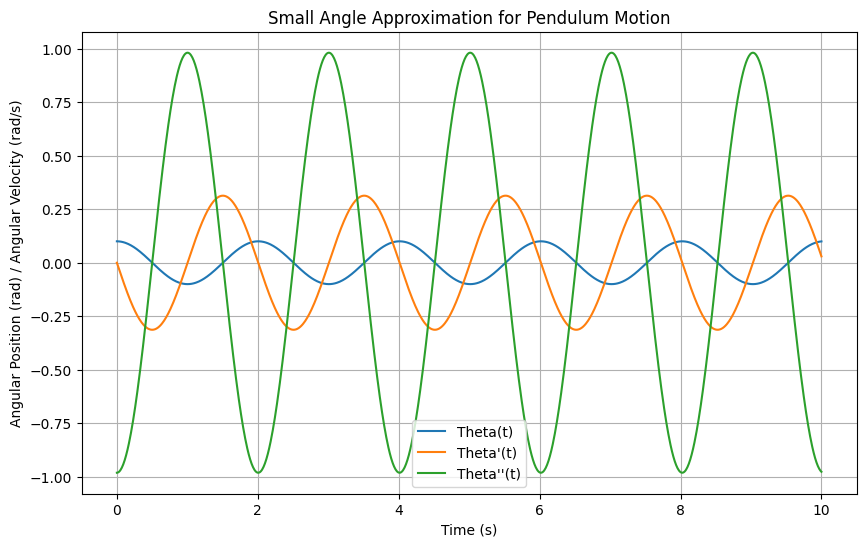

Maximum error in satisfying the simplified pendulum equation: 1.1102230246251565e-16


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants for the pendulum
g = 9.81  # Gravity (m/s^2)
l = 1.0  # Length of the pendulum (m)

# Time array
t = np.linspace(0, 10, 1000)

# General solution for small angle approximation
theta_0 = 0.1  # Initial angle (rad)
omega = np.sqrt(g / l)  # Angular frequency (rad/s)

# General solution
theta = theta_0 * np.cos(omega * t)

# First derivative of theta
dtheta_dt = -theta_0 * omega * np.sin(omega * t)

# Second derivative of theta
d2theta_dt2 = -theta_0 * omega**2 * np.cos(omega * t)

# Plot the solution
plt.figure(figsize=(10, 6))
plt.plot(t, theta, label='Theta(t)')
plt.plot(t, dtheta_dt, label="Theta'(t)")
plt.plot(t, d2theta_dt2, label="Theta''(t)")
plt.xlabel('Time (s)')
plt.ylabel('Angular Position (rad) / Angular Velocity (rad/s)')
plt.title('Small Angle Approximation for Pendulum Motion')
plt.legend()
plt.grid(True)
plt.show()

# Verify that theta(t) satisfies the simplified pendulum equation
# for small angles: l * d2theta_dt2 = -g * theta
# This should be approximately true within the limits of the small angle approximation
left_side = l * d2theta_dt2
right_side = -g * theta
error = np.max(np.abs(left_side - right_side))
print(f"Maximum error in satisfying the simplified pendulum equation: {error}")


#### Reduction of Order

Reduction of order is a technique used to transform higher-order differential equations into a system of first-order differential equations. This approach is particularly useful because many numerical methods are designed to solve first-order differential equations. The process involves defining a state vector, $S(t)$, which encapsulates all the dependent variables and their derivatives relevant to the system's behavior up to the $n-1$th order.

an $nth$ order differential equation expressed as $f^{(n)}(t)=F(t,f(t),f'(t),f''(t),...,f^{(n-1)}(t))$

Reduce the Order - Go from higher order ODEs to a first order ODE.

State of the System - S(t) - Collection of all the dependent variables that are relevant to the behavior of the system.

Turn an nth order ODE into n 1st order ODEs that are coupled together, meaning they share the same terms.

Linear ODE's can be written in the matrix form: dS(t)/dt = [ 0, 1; -g/l, 0]S(t)

The State can hold multiple dependent variables and their derivatives as long as the derivatives are with respect to the same independent variable.

a system of first-order differential equations (ODEs) defined by the equations $\frac{dx}{dt}=3x-2y$ and $\frac{dy}{dt}=4x+y$, where x and y are functions of time t. The initial conditions are $x(0)=1$ and $y(0)=0$, and the solution is sought over the time interval from $t=0$ to $t=5$.

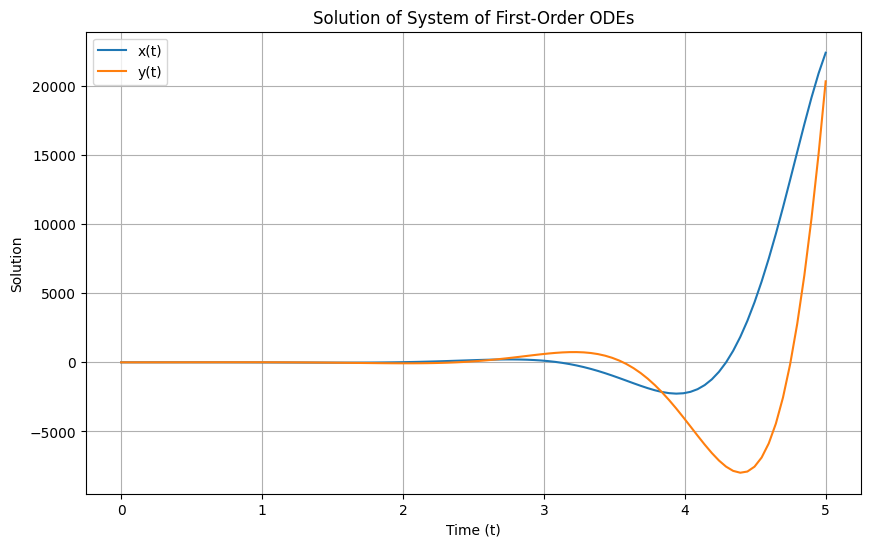

In [ ]:
from scipy.integrate import solve_ivp
# Define a system of first-order differential equations (ODEs)
def system_of_odes(t, S):
    x, y = S  # Unpack the state vector S
    dxdt = 3*x - 2*y  # First ODE
    dydt = 4*x + y    # Second ODE
    return [dxdt, dydt]

# Initial conditions for x and y
x0 = 1  # Initial condition for x
y0 = 0  # Initial condition for y
S0 = [x0, y0]  # Initial state vector

# Time span for the solution
t_span = (0, 5)  # From t=0 to t=5

# Solve the system of ODEs
sol = solve_ivp(system_of_odes, t_span, S0, t_eval=np.linspace(t_span[0], t_span[1], 100))

# Plot the solution for x and y over time
plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[0], label='x(t)')
plt.plot(sol.t, sol.y[1], label='y(t)')
plt.xlabel('Time (t)')
plt.ylabel('Solution')
plt.title('Solution of System of First-Order ODEs')
plt.legend()
plt.grid(True)
plt.show()



#### The Euler Method

The Euler Method is a fundamental numerical approach for solving first-order differential equations, specifically designed for initial value problems. It works by approximating the solution at successive points on a numerical grid that spans the interval $[t_0,t_f]$ with a step size h. This method is particularly useful because it transforms complex differential equations into a series of manageable calculations.

Used to compute an approximation for the state at $S(t_j+1)$ given the state at $S(t_j)$. Is the simplest and most intuitive method for solving IVPs. At any state $(t_j, S(t_j))$ it uses F at that state to point toward the next state and then mobes in that direction a distance of h.

$S(t_j+1) = S(t_j) + h*F(t_j , S(t_j))$

We can compute $S(t_j)$ for every $t_j$ in t using the steps:

Store S0 = S(t0) in an array, S.

Compute S(t1) = S0 + hF(t0, S0).

Store S1 = S(t1) in S.

Compute S(t2) = S1 + hF(t1, S1).

Store S2 = S(t2) in S.

...

Compute S(t_f) = S_fminus1 + hF(t_fminus1, S_fminus1).

Store S_f = S(t_f) in S.

S in an approximation of the solution to the initial value problem.

The differential equation $𝑑𝑓(𝑡)𝑑𝑡=𝑒^{−𝑡}$ with initial condition $𝑓_0=−1$ has the exact solution $𝑓(𝑡)=−𝑒^{−𝑡}$. Approximate the solution to this initial value problem between 0 and 1 in increments of 0.1 using the Explicity Euler Formula. Plot the difference between the approximated solution and the exact solution.

<ipython-input-4-53e864c3c24f>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


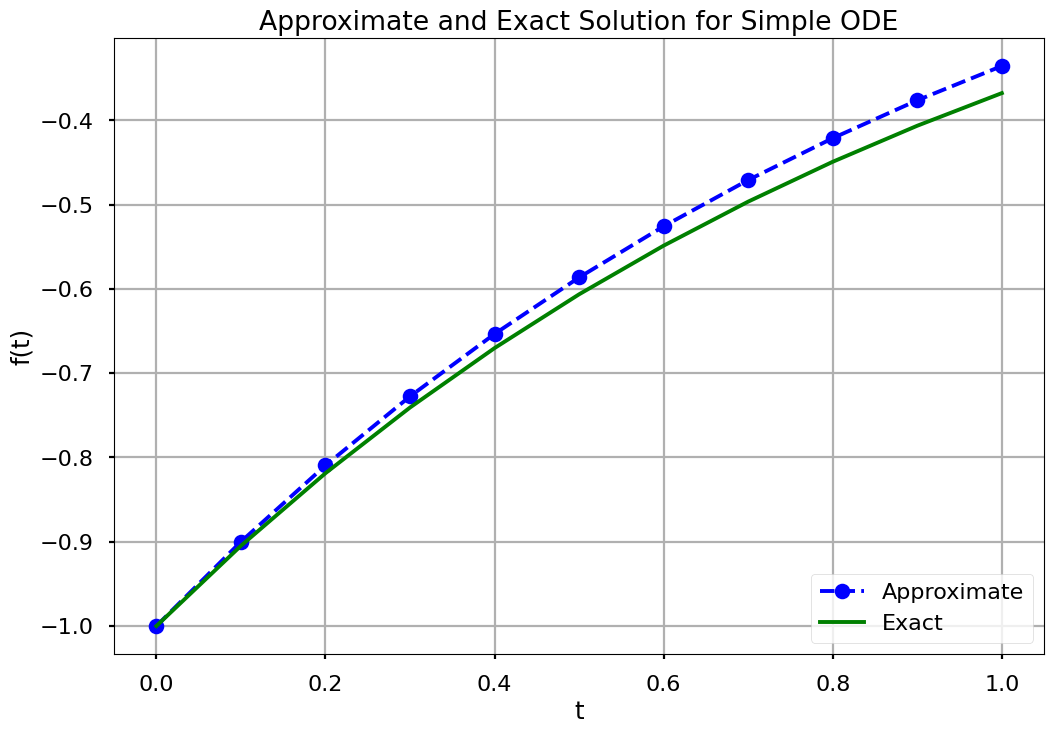

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')
%matplotlib inline

# Define parameters
f = lambda t, s: np.exp(-t) # ODE
h = 0.1 # Step size
t = np.arange(0, 1 + h, h) # Numerical grid
s0 = -1 # Initial Condition

# Explicit Euler Method
s = np.zeros(len(t))
s[0] = s0

for i in range(0, len(t) - 1):
    s[i + 1] = s[i] + h*f(t[i], s[i])

plt.figure(figsize = (12, 8))
plt.plot(t, s, 'bo--', label='Approximate')
plt.plot(t, -np.exp(-t), 'g', label='Exact')
plt.title('Approximate and Exact Solution \
for Simple ODE')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

the use of Euler's method to approximate the motion of a pendulum over time, given an initial angle of $\frac{π}{4}$ radians and an initial angular velocity of 0. The plot shows the angle Θ(t) and the angular velocity dΘ/dt as functions of time. This method calculates the state of the system at discrete time steps, allowing us to observe the dynamics of the pendulum under the influence of gravity.

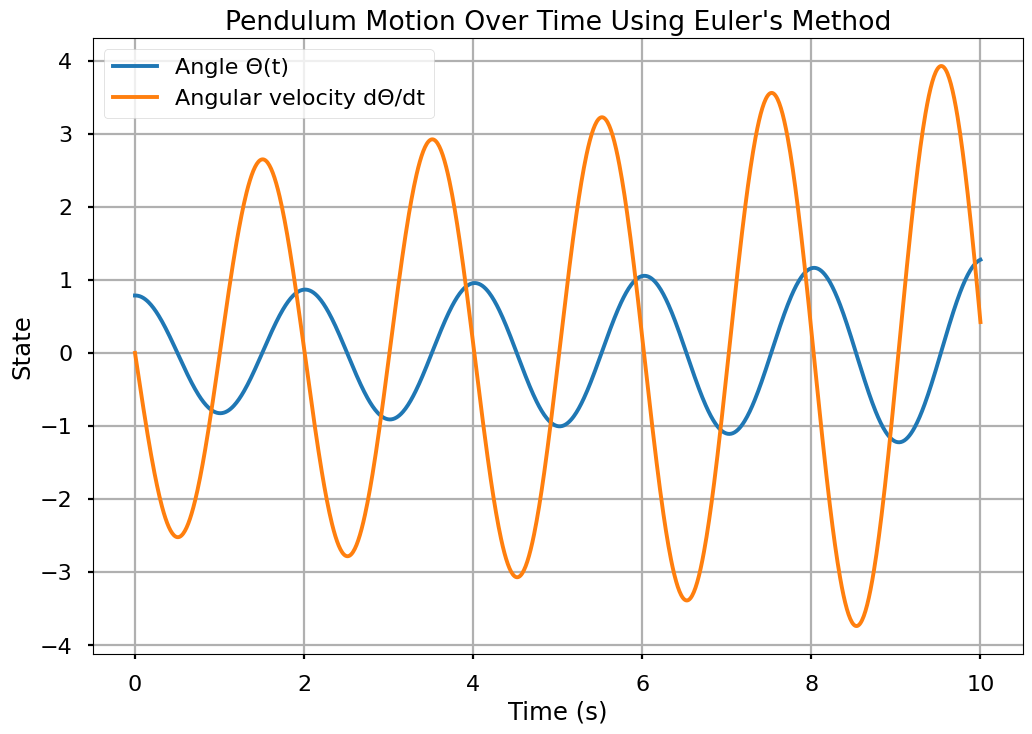

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the ODE system parameters
g = 9.81  # Acceleration due to gravity (m/s^2)
l = 1     # Length of the pendulum (m)

# Define the function F(t, S) for the ODE
F = lambda t, S: np.array([S[1], -(g/l)*S[0]])

# Euler method parameters
t0 = 0      # Start time
tf = 10     # End time
h = 0.01    # Step size
N = int((tf - t0)/h)  # Number of steps

# Initial condition
S0 = np.array([np.pi/4, 0])  # Initial angle and angular velocity

# Time points
t = np.linspace(t0, tf, N+1)

# Initialize array to store the solution
S = np.zeros((N+1, 2))
S[0] = S0

# Euler's method
for i in range(N):
    S[i+1] = S[i] + h * F(t[i], S[i])

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(t, S[:, 0], label='Angle Θ(t)')
plt.plot(t, S[:, 1], label='Angular velocity dΘ/dt')
plt.title('Pendulum Motion Over Time Using Euler\'s Method')
plt.xlabel('Time (s)')
plt.ylabel('State')
plt.legend()
plt.grid(True)
plt.show()
